In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.chdir('/content/drive/MyDrive/dacon/daconcup/')
import utils

In [ ]:
train_raw = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/raw/train.csv', encoding='cp949')
info_user_raw = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/raw/info_user.csv', encoding='cp949')
info_login_raw = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/raw/info_login.csv', encoding='cp949')
info_cpt_raw = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/raw/info_competition.csv', encoding='cp949')
info_sub_raw = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/raw/info_submission.csv', encoding='cp949')
sub_raw = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/raw/submission.csv', parse_dates=['DateTime'], encoding='cp949')

# 1 
    train_preped_01.csv

## 변수 8개

- date	
    - 2019-07-04부터 시작(제출수의 결측치 때문에)

- 사용자

- 세션

- 신규방문자	

- 페이지뷰	

- cnt_signin	

- cnt_login	

- cnt_sub	

- total_participants


In [ ]:
def train_prep(df):
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df['date'] = df.DateTime.dt.date
    df = df.groupby('date').sum().reset_index()
    return df

def info_prep(df, col='count'):
    # date 변수 추출
    df['c_time'] = pd.to_datetime(df['c_time'])
    df['date'] = df['c_time'].dt.date
    
    # missing value 제거
    df = df.dropna(how='all') # 모든 row가 missing value 일 때

    df = df.groupby('date')['date'].count().to_frame(name=col).reset_index()
    return df

In [ ]:
train = train_prep(train_raw)
info_user = info_prep(info_user_raw, 'cnt_signin')
info_login = info_prep(info_login_raw, 'cnt_login')
info_sub = info_prep(info_sub_raw, 'cnt_sub')

In [ ]:
sub = sub_raw.copy()
sub['date'] = sub['DateTime'].dt.date
sub = sub[['date', '사용자', '세션', '신규방문자', '페이지뷰']]

train['isTrain'] = 1
sub['isTrain'] = 0
data = pd.concat([train, sub], axis=0).reset_index(drop=True)

In [ ]:
data = data.merge(info_user, on='date', how='left')
data = data.merge(info_login, on='date', how='left')
data = data.merge(info_sub, on='date', how='left')

In [ ]:
data.isna().sum()

date            0
사용자             0
세션              0
신규방문자           0
페이지뷰            0
isTrain         0
cnt_signin     42
cnt_login      45
cnt_sub       105
dtype: int64

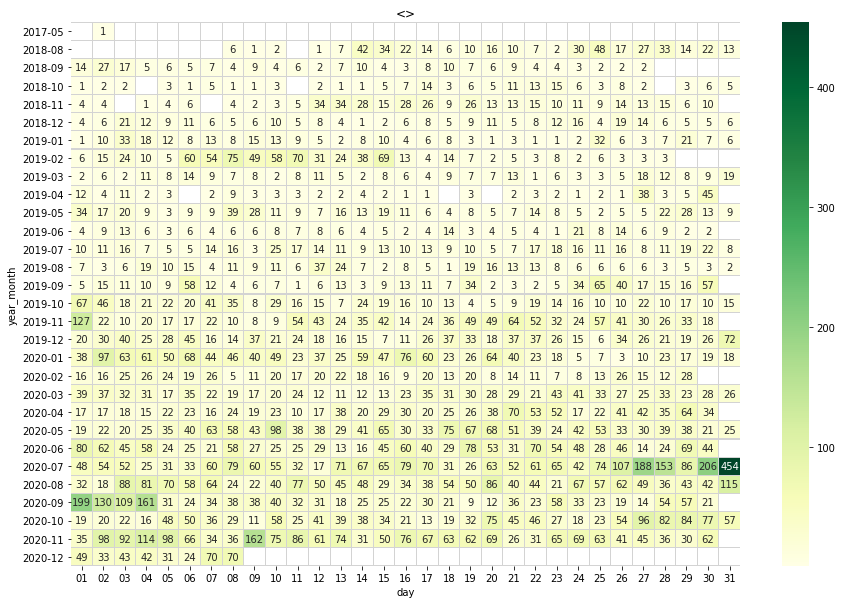

In [ ]:
utils.check_date(info_user) # cnt_signin : 결측치 0으로 채우기

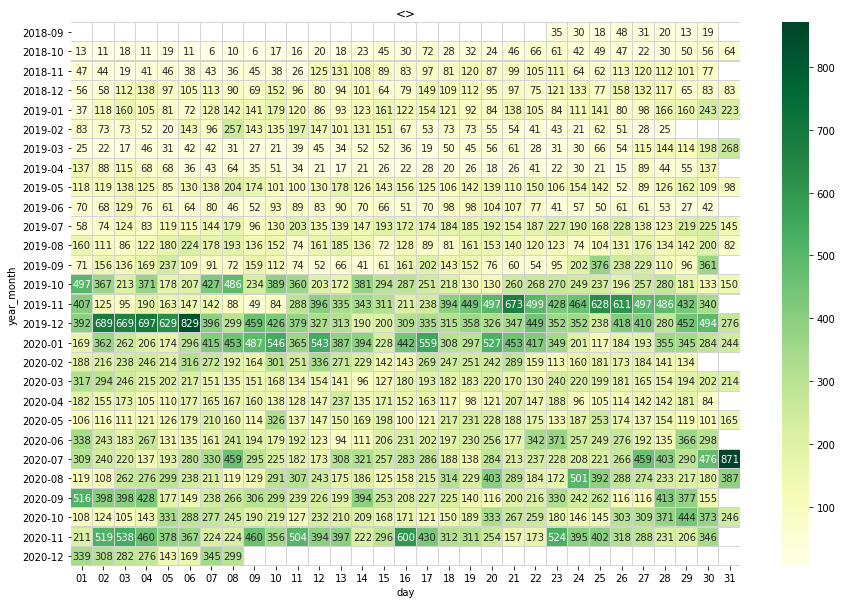

In [ ]:
utils.check_date(info_login) # cnt_login : 결측치 부분 데이터 제거 
                             # 맨 앞에 있는 14일 빼고는 데이터 전부 있음

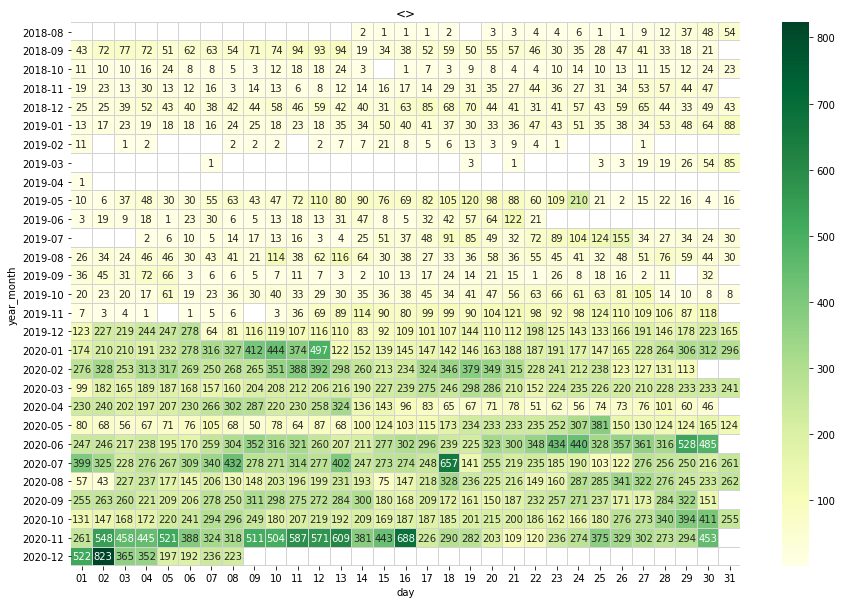

In [ ]:
utils.check_date(info_sub) # cnt_sub : 2019-07-04이후로 유의미한 데이터라고 판단됨
                           # 만약 이 변수를 사용한다면 2019-07-04 이후 결측치를 0으로 바꿔서 해당 구간만 사용하기

In [ ]:
# 결측치 처리
data['cnt_signin'] = data.cnt_signin.fillna(0)
data['cnt_sub'] = data.cnt_sub.fillna(0)
data['date'] = pd.to_datetime(data['date'])
data = data[data['date'] >= '2019-07-04'].reset_index(drop=True)

In [ ]:
info_cpt = utils.info_cpt_prep(info_cpt_raw) # date | name(대회이름)s | total_participants 인 df
data = data.merge(info_cpt[['date', 'total_participants']], on='date', how='left')

In [ ]:
data = data[['date', '사용자', '세션', '신규방문자', '페이지뷰', 'cnt_signin',
       'cnt_login', 'cnt_sub', 'total_participants', 'isTrain']]

data.head()

,date,사용자,세션,신규방문자,페이지뷰,cnt_signin,cnt_login,cnt_sub,total_participants,isTrain
0,2019-07-04,625,632,232,4693,7.0,83.0,2.0,786,1
1,2019-07-05,596,600,175,5950,5.0,119.0,6.0,786,1
2,2019-07-06,526,540,140,5309,5.0,115.0,10.0,786,1
3,2019-07-07,422,453,86,5374,14.0,144.0,5.0,786,1
4,2019-07-08,505,545,105,6402,16.0,179.0,14.0,786,1


In [ ]:
data.shape

(555, 10)

In [ ]:
data.to_csv('/content/drive/MyDrive/dacon/daconcup/Data/all_preped_01.csv', index=False)

# 2
    train_preped_02.csv